In [1]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

%matplotlib inline

In [2]:
#You can ignore any warnings using below lines

import warnings
warnings.simplefilter('ignore')

In [3]:

# setup logger# setup l 
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
    
# get logger
logger = logging.getLogger(__name__)

In [4]:

# Check if interactive plot is enabled, if not enable it.# Check i 

logger.info('Checking Interactive session')
    
if plt.isinteractive():
    print("Plotting is not interactive, Setting it to interactive mode ...")
    plt.interactive(True)
else:
    print("Plotting is already interactive")

2019-01-29 09:48:47,347 - __main__ - INFO - Checking Interactive session


Plotting is not interactive, Setting it to interactive mode ...


## Data Variables

Variable Description <br>
Item_Identifier : Unique product ID <br>
Item_Weight : Weight of product <br> 
Item_Fat_Content : Whether the product is low fat or not <br>
Item_Visibility : The % of total display area of all products in a store allocated to the particular product <br>
Item_Type : The category to which the product belongs <br>
Item_MRP : Maximum Retail Price (list price) of the product <br>
Outlet_Identifier : Unique store ID <br>
Outlet_Establishment_Year : The year in which store was established <br>
Outlet_Size : The size of the store in terms of ground area covered <br>
Outlet_Location_Type : The type of city in which the store is located <br>
Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket <br>
Item_Outlet_Sales : Sales of the product in the particulat store. This is the outcome variable to be predicted. <br>

In [6]:
#Read DataSets, the files are read from disk in to memory:

logger.info('Reading the Data Mart datasets')


train_dataset = pd.read_csv(r"C:\Users\divyakamat\data\DataSets\mart\train.csv")
test_dataset = pd.read_csv(r"C:\Users\divyakamat\data\DataSets\mart\test.csv")

2019-01-28 19:56:40,524 - __main__ - INFO - Reading the Data Mart datasets


In [47]:
train_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [48]:
columns = train_dataset.columns
index = train_dataset.index
data = train_dataset.values


In [49]:
#RangeIndex is special type of index object analogous to Range object in Python, the values are not loaded into memory
#until its necessary
index 

RangeIndex(start=0, stop=8523, step=1)

In [50]:
columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [51]:
data

array([['FDA15', 9.3, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        3735.138],
       ['DRC01', 5.92, 'Regular', ..., 'Tier 3', 'Supermarket Type2',
        443.4228],
       ['FDN15', 17.5, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        2097.27],
       ..., 
       ['NCJ29', 10.6, 'Low Fat', ..., 'Tier 2', 'Supermarket Type1',
        1193.1136],
       ['FDN46', 7.21, 'Regular', ..., 'Tier 3', 'Supermarket Type2',
        1845.5976],
       ['DRG01', 14.8, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        765.67]], dtype=object)

In [52]:
#RangeIndex are subclass of Index and they are very similar
print(type(index))   #Row Index
print(type(columns)) #Column Index
print(type(data))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


## Understanding data types

In broad terms, data may be classified as Continous or Categorical.
Continuous Data 
- Numeric and represents measurement (height, weight etc)
- Takes an infinite number of possibilities

Categorical Data
- Represents discrete values
- Represents finite values


In [53]:
train_dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Pandas defaults core numeric types - integers and floats to 64 bits regardless of size for the data to fit in memory.
A column with integer value 0 will also have data type as int64

In [54]:
#Get the count of columns for each type
train_dataset.get_dtype_counts()

float64    4
int64      1
object     7
dtype: int64

## Object Data Types

- Object datatype column may contain values of any valid Python objects, they need not be necessarily strings
- These may possibly contain a mixture of Integers, Booleans, strings, lists or dictionaries
- Its a catch-all for columns, for which Pandas is not able to identify the data type.

### Selecting a single column of data from Series

- Indexing operation
- Dot notation

Series 
- is a single column of data from a DataFrame
- A single dimension of data, composed of just an index and the data

In [55]:
train_dataset['Outlet_Size'].head()

0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

In [56]:
train_dataset.Outlet_Size

0       Medium
1       Medium
2       Medium
3          NaN
4         High
5       Medium
6         High
7       Medium
8          NaN
9          NaN
10      Medium
11       Small
12      Medium
13       Small
14        High
15       Small
16      Medium
17      Medium
18      Medium
19       Small
20        High
21      Medium
22       Small
23       Small
24       Small
25         NaN
26       Small
27        High
28         NaN
29       Small
         ...  
8493       NaN
8494       NaN
8495     Small
8496       NaN
8497     Small
8498    Medium
8499     Small
8500       NaN
8501       NaN
8502       NaN
8503     Small
8504    Medium
8505    Medium
8506    Medium
8507     Small
8508       NaN
8509       NaN
8510     Small
8511    Medium
8512      High
8513     Small
8514       NaN
8515    Medium
8516    Medium
8517     Small
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

Columns of data may be accessed using dot notation (as above), however its not recommended to use dot to access the data with production code for following reasons:
- Not a best practice and is prone to error and misuse
- Column names with spaces/special characters cannot be accessed
- Columns names that collide with DataFrame methods also fail
- Assigning new values or deleting columns might give unexpected results.

In [57]:
#convert series to dataframe using to_frame() method, it uses Series name as the new column name
df = train_dataset['Outlet_Size']
df.to_frame().head()

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High


### Calling Series Methods

In [58]:
#Number of attributes and methods in Series
s_attr_methods = set(dir(pd.Series))
len(s_attr_methods)

439

In [59]:
#Number of attributes and method in DataFrame
df_attr_methods = set(dir(pd.DataFrame))
len(df_attr_methods)

444

In [60]:
#Attributes and methods common to both - Series and DataFrames

len(s_attr_methods & df_attr_methods)

373

In [61]:
size = train_dataset['Outlet_Size']
item = train_dataset['Item_Visibility']

Useful method for objects datatype - value_counts()

In [62]:
item.count() #Gives total not null values

8523

In [63]:
#SummaryStatictics

item.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [64]:
item.quantile(.1) # Gives the quantile values

0.012041769800000001

In [65]:
item.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9]) # pass the list of quantile values it resturns a series

0.1    0.012042
0.2    0.022558
0.3    0.031956
0.4    0.041754
0.5    0.053931
0.6    0.067958
0.7    0.083456
0.8    0.106924
0.9    0.139514
Name: Item_Visibility, dtype: float64

In [66]:
#Following operations can be done to the series.

# item + 1
# item // 7
# item ** 2


## Chaining Series Methods together

Sequential invocation of methods using dot notation is method chaining

In [67]:
size.isnull().sum()

2410

- Index provides label for each of the rows
- If no index is explicitly provided, then by default a RangeIndex is created with labels as inteers from 0 to n-1
- by default, set_index will drop the index column from the dataframe.
- This can be avoided by setting the drop parameter to false.

In [68]:
train_dataset=train_dataset.set_index('Item_Identifier')

#Reset index, the column will be the first column after reset
#train_dataset.reset_index()

### Renaming rows and columns names

In [69]:
#Renames index and column names

idx_rename = {'FDA15':'fda15','DRC01':'drc01'}
col_rename = {'Item_Weight':'itemweight','Item_Type':'itemtype'}

train_dataset.rename(index=idx_rename,columns=col_rename).head()

,itemweight,Item_Fat_Content,Item_Visibility,itemtype,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
fda15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
drc01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [70]:
#There are two ways to select columns

train_dataset[['Item_Weight','Item_Type']].head()

cols = ['Item_Weight','Item_Type']
train_dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Select columns with methods

In [71]:
train_dataset.get_dtype_counts()

float64    4
int64      1
object     6
dtype: int64

In [72]:
train_dataset.select_dtypes(include=['float']).head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Identifier,,,,
FDA15,9.30,0.016047,249.8092,3735.1380
DRC01,5.92,0.019278,48.2692,443.4228


In [73]:
train_dataset.select_dtypes(include=['number']).head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
FDA15,9.30,0.016047,249.8092,1999,3735.1380
DRC01,5.92,0.019278,48.2692,2009,443.4228


In [74]:
#Filter all columns with a particular column
train_dataset.filter(like='Item').head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales
Item_Identifier,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,994.7052


## Ordering column names

Import dataset and analayse the order of the column, below are few guidelines
- classify each column as either discrete or continuous
- Group common columns with discrete and continuous columns
- Place the most important groups of columns first with categorical before discrete

In [75]:
train_dataset.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

disc_core / disc_people / disc_other / cont_fb + cont_others

 ## Missing Values

Pandas uses np.nan objects to represent missing values, this is unusual object and is not equal to itself

In [76]:
np.nan == np.nan

False

In [77]:
np.nan != 5 

True

## Transposing the diversion of a DataFrame operation

axis parameter - 0 or 1. <br>
1 --> columns <br>
0 --> rows <br>
This controls the direction in which the operation takes place.
By default, axis paarmeter is set to 0


In [78]:
test = train_dataset.filter(like='Item')

In [79]:
test.count()  #non missing valuee

Item_Weight          7060
Item_Fat_Content     8523
Item_Visibility      8523
Item_Type            8523
Item_MRP             8523
Item_Outlet_Sales    8523
dtype: int64

In [80]:
test.count(axis = 'columns').head()  #non missing valuee for each row of data

Item_Identifier
FDA15    6
DRC01    6
FDN15    6
FDX07    6
NCD19    6
dtype: int64

In [81]:
test.sum(axis='columns').head()

Item_Identifier
FDA15    3994.263247
DRC01     497.631278
FDN15    2256.404760
FDX07     933.675000
NCD19    1057.496600
dtype: float64

In [80]:
test.median(axis='index').head()

Item_Weight            12.600000
Item_Visibility         0.053931
Item_MRP              143.012800
Item_Outlet_Sales    1794.331000
dtype: float64

## Data Analysis

- Develop data analysis routine
    - Collection of metadata
    - Univariate descriptive statistics
    - Common set of tasks when first importing any dataset
    - Routine to be implemented when firt examining a dataset
- Reducing memory by changing data types
- Selecting the smallest of the largest
- Selecting the largetst of each group by sorting
- Replicating nlargest with sort_values


### EDA (Exploratory Data Analysis)
- Term used to encompasses the entire process of analysing data
- Much of EDA involves visually displaying differnt relationships among data
- Detects interesting patterns
- Develops hypotheses


Routine
- Read the dataset
- Get the shape
- Get the datatypes info using .info() data
- Use describe to get the statistical summary

In [82]:
#.T transposes the output of describe 
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [83]:
train_dataset.describe(include=[np.number])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [84]:
#Summary Statistics for categorical columns

train_dataset.describe(include=[np.object,pd.Categorical]).T

,count,unique,top,freq
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [85]:
train_dataset.describe(include=[np.number],percentiles=[.01,.05,.1,.5,.75,.9,.95,.99]).T   

,count,mean,std,min,1%,5%,10%,50%,75%,90%,95%,99%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,5.150000,5.9450,6.695000,12.600000,16.850000,19.350000,20.25000,20.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.000000,0.0000,0.012042,0.053931,0.094585,0.139514,0.16378,0.226249,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,35.062752,42.5167,52.795600,143.012800,185.643700,231.200480,250.76924,263.022600,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1985.000000,1985.0000,1985.000000,1999.000000,2004.000000,2009.000000,2009.00000,2009.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,83.890800,188.4214,343.552800,1794.331000,3101.296400,4570.051200,5522.81100,7366.011720,13086.964800


### Reduce memory by changing data types
- Inspect the data types of the columns
- Extract the memory usage for each columns using memory_usage module, for Pandas to extract the memory usage of the object column the deep parameter should be set to True
- for the columns which store just 0 or 1 , can be converted to 8 byte using astrype method
#### train_dataset['colname'] = train_dataset['colname'].astype(np.int8)


- change object datatypes to categorical, if they have reasonably low unique values.

Every object datatype can be of any type (list/strings etc) and so memory of each individual value is inconsistent.

In [86]:
#Inspect the data types of the columns
train_dataset.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [87]:
#Extract the memory usage for each columns, for Pandas to extract the memory usage of the object column the deep parameter should be set to True
memory = train_dataset.memory_usage(deep=True)

In [88]:
#Check number of unique values for object datatypes
train_dataset.select_dtypes(include=['object']).nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [89]:
#Convert Outlet_Size and Outlet_Location_Type to Categorical datatype

train_dataset['Outlet_Size']= train_dataset['Outlet_Size'].astype('category')
train_dataset['Outlet_Location_Type']= train_dataset['Outlet_Location_Type'].astype('category')

In [90]:
train_dataset.dtypes

Item_Weight                   float64
Item_Fat_Content               object
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                    object
Item_Outlet_Sales             float64
dtype: object

In [91]:
new_memory = train_dataset.memory_usage(deep=True)

#Calculate the % of memory reduction

new_memory / memory

Index                        1.000000
Item_Weight                  1.000000
Item_Fat_Content             1.000000
Item_Visibility              1.000000
Item_Type                    1.000000
Item_MRP                     1.000000
Outlet_Identifier            1.000000
Outlet_Establishment_Year    1.000000
Outlet_Size                  0.019191
Outlet_Location_Type         0.016374
Outlet_Type                  1.000000
Item_Outlet_Sales            1.000000
dtype: float64

## Boolean Indexing

In [5]:
train_dataset = pd.read_csv(r"C:\Users\divyakamat\data\DataSets\mart\train.csv",index_col='Item_Identifier')
train_dataset.head()
#train_dataset['Item_Type'].value_counts()

item_gt_5 = train_dataset['Item_Weight'] > 5.0
item_gt_5.head()

Item_Identifier
FDA15    True
DRC01    True
FDN15    True
FDX07    True
NCD19    True
Name: Item_Weight, dtype: bool

In [14]:
#In all there are 7011 items with weight gt than 5
item_gt_5.sum()

7011

In [15]:
#There are around 82% with items with weight gt 5
item_gt_5.mean()

0.82259767687434004

In [20]:
item_gt_5.value_counts(normalize=True) #This checks the true and false distribution (however this contains missing values)


True     0.822598
False    0.177402
Name: Item_Weight, dtype: float64

In [24]:
#Drop rows with NA and then calculate the mean.
train_dataset['Item_Weight'].dropna().gt(5).mean()

0.99305949008498584

In [27]:
item_gt_5.describe()

count     8523
unique       2
top       True
freq      7011
Name: Item_Weight, dtype: object

 ### Boolean Expressions in Python
 
 - Built-in logical operators and, or and not keywords do not work with Boolean indexing in pandas
 - These are replaced with &, | and ~
 - Each expression must be wrapped in ( )
 
 criteria1 = condition1
 criteria2 = condition2
 criteria3 = condition3
 
 criteria_final = criteria1 & criteria2 & criteria3
 criteria_final.head()

In [6]:
train_dataset.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
outlet_sales = train_dataset['Item_Outlet_Sales']
outlet_sales.head()

Item_Identifier
FDA15    3735.1380
DRC01     443.4228
FDN15    2097.2700
FDX07     732.3800
NCD19     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [11]:
#Check for null values
outlet_sales.isnull().sum()

0

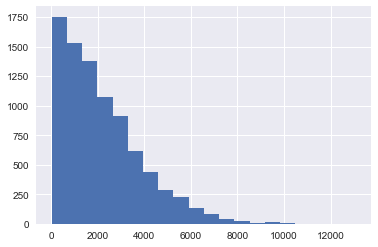

In [18]:
#log_outsales = np.log(outlet_sales)
outlet_sales.hist(bins=20)

In [23]:
mean = outlet_sales.mean()

In [24]:
std = outlet_sales.std()

In [25]:
outlet_sales.median()

1794.3310000000001

In [28]:
# |outlet_sales - mean(outlet_sales)| / std(outlet_sales) - 
# this formula calculates the z-scores, which is the number of standard deviations away from the mean 

z_score= outlet_sales.sub(mean).abs().div(std)

In [29]:
pcts = [z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation.' 
       '{:.3f} fall within 2 and {:.3f} fall within 3'.format(*pcts))

0.705 fall within 1 standard deviation.0.952 fall within 2 and 0.989 fall within 3
